In [2]:
import pandas as pd
import numpy as np
import os
from joblib import load
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [4]:
path = os.getcwd()

# Interpretability methods

In [5]:
# Read the CSV file containing the results
df_all = pd.read_csv(path + '/Part_1_result_new/Total_Results_new.csv')

In [6]:
df_all

,Type,Market,Accuracy,Balanced Accuracy,F1 Score
0,LIME,USDEUR,0.540230,0.541251,0.636364
1,PFI,USDEUR,0.513410,0.514445,0.616314
2,RANDOM,USDEUR,0.467433,0.467792,0.512281
3,XGB,USDEUR,0.475096,0.475220,0.490706
4,LIME,USDJPY,0.513410,0.515584,0.509653
...,...,...,...,...,...
63,XGB,EURDKK,0.590038,0.500000,0.742169
64,LIME,EURNOK,0.532567,0.526559,0.598684
65,PFI,EURNOK,0.517241,0.512824,0.571429
66,RANDOM,EURNOK,0.517241,0.513147,0.568493


In [7]:
# Replace the names of some Type for better clarity
df_all['Type'] = df_all['Type'].replace({
    'XGB': 'XGBFI',
    'LIME': 'SP LIME'
})

## Accuracy

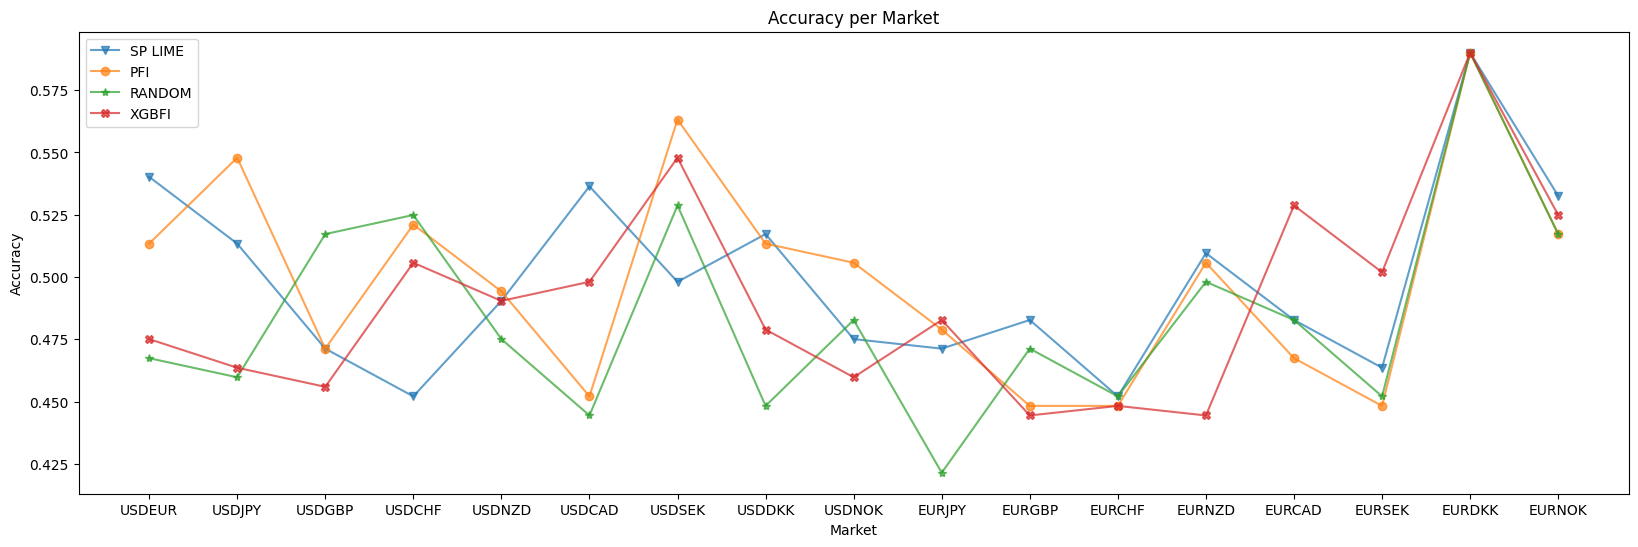

In [8]:
# Change the 'Market' column datatype to categorical
df_all['Market'] = df_all['Market'].astype('category')
marker_list = ['v', 'o', '*', 'X']

# Plotting the accuracy for each market
plt.figure(figsize=(20, 6))
for i, type in enumerate(df_all['Type'].unique()):
    data = df_all[df_all['Type'] == type]
    plt.plot(data['Market'], data['Accuracy'], label=type, alpha=0.7, marker=marker_list[i])
plt.xlabel('Market')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Market')
plt.show()


## Balanced Accuracy

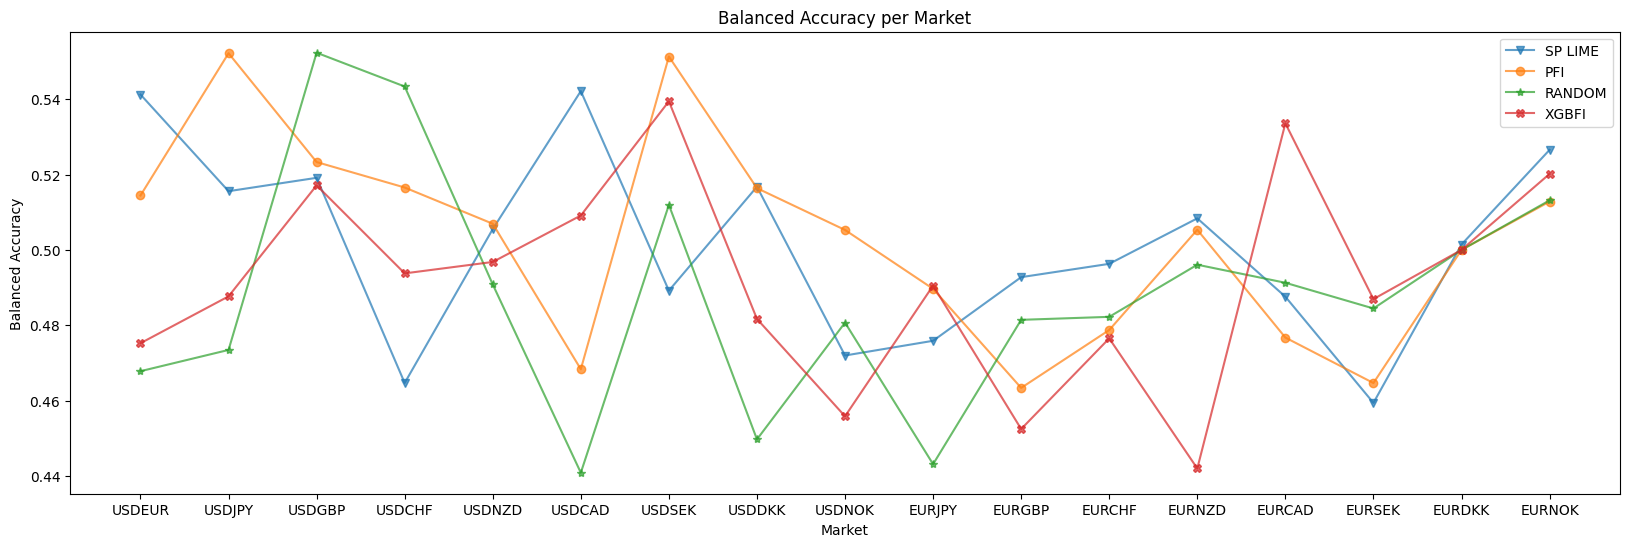

In [9]:
# Plot the balanced accuracy for each market
plt.figure(figsize=(20, 6))
for i, type in enumerate(df_all['Type'].unique()):
    data = df_all[df_all['Type'] == type]
    plt.plot(data['Market'], data['Balanced Accuracy'], label=type, alpha=0.7, marker=marker_list[i])
plt.xlabel('Market')
plt.ylabel('Balanced Accuracy')
plt.legend()
plt.title('Balanced Accuracy per Market')
plt.show()

## F1 Score

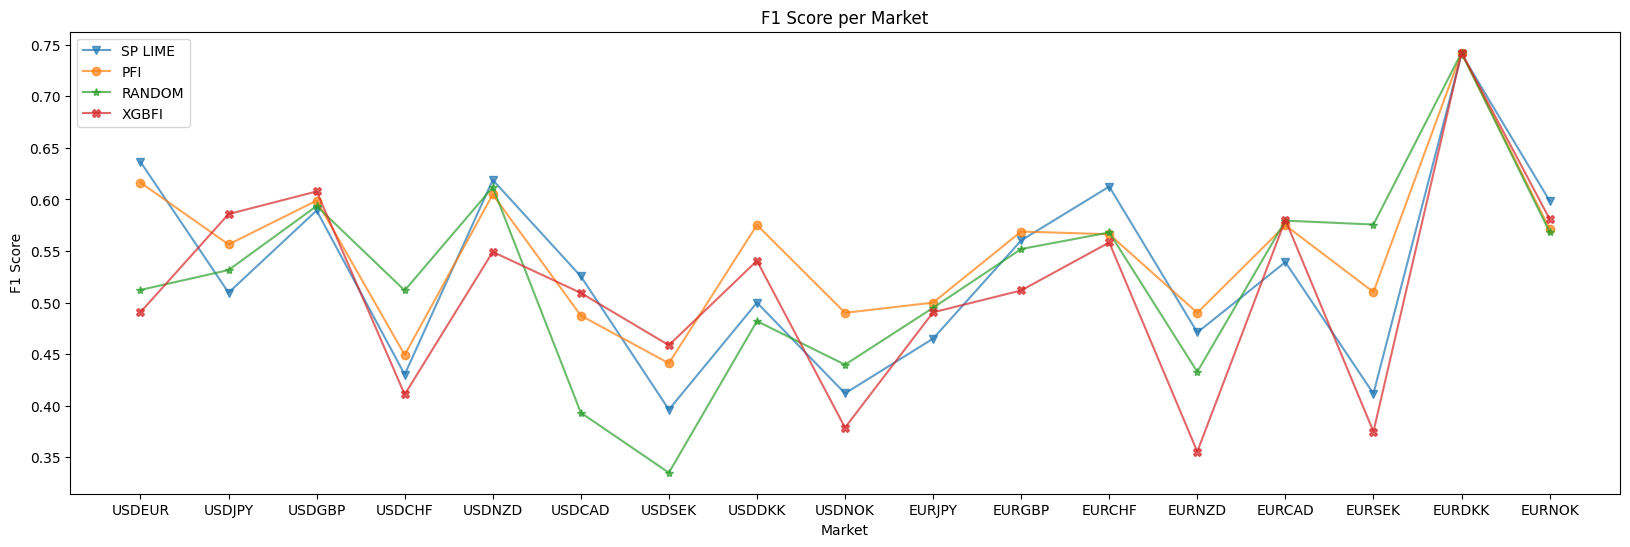

In [10]:
# Plot the F1 Score for each market 
plt.figure(figsize=(20, 6))
for i, type in enumerate(df_all['Type'].unique()):
    data = df_all[df_all['Type'] == type]
    plt.plot(data['Market'], data['F1 Score'], label=type, alpha=0.7, marker=marker_list[i])
plt.xlabel('Market')
plt.ylabel('F1 Score')
plt.legend()
plt.title('F1 Score per Market')
plt.show()


# Model balanced accuracy

In [ ]:
# Read ML models' results
df_ML_model = pd.read_csv(path + '/ml_acc_df_new_data.csv')
df_LSTM = pd.read_csv(path + '/LSTM_acc_df_val1_for_vali.csv')

# Filter balanced accuracy coumns
df_ML_balance = df_ML_model[[col for col in df_ML_model.columns if 'balance' in col]]
df_LSTM_balance = df_LSTM[[col for col in df_LSTM.columns if 'balance' in col]]
# Rename the columns for better clarity
df_LSTM_balance = df_LSTM_balance.rename(columns={'balanced' : 'LSTM balanced'})

In [ ]:
# Concatenate the balanced accuracy DataFrames for statistical learning models and LSTM on columns
df_concat = pd.concat([df_ML_balance, df_LSTM_balance], axis=1)

In [ ]:
df_concat.columns

Index(['SVM Gaussian Kernel balance', 'Logistic Regression balance',
       'LDA balance', 'QDA balance', 'Random Forest balance',
       'XGBoost balance', 'LSTM balanced'],
      dtype='object')

In [ ]:
df_concat = df_concat.rename(columns={'SVM Gaussian Kernel balance' : 'SVM Gaussian Kernel', 'Logistic Regression balance' : 'Logistic Regression',
                                      'LDA balance' : 'LDA', 'QDA balance' : 'QDA',
                                      'Random Forest balance' : 'Random Forest', 'XGBoost balance' : 'XGBoost',
                                      'LSTM balanced' : 'LSTM'})

In [ ]:
df_concat

,SVM Gaussian Kernel,Logistic Regression,LDA,QDA,Random Forest,XGBoost,LSTM
0,0.500000,0.500000,0.529991,0.494395,0.522889,0.500727,0.500000
1,0.505691,0.500000,0.505092,0.472331,0.490580,0.518171,0.475812
2,0.501700,0.500000,0.513599,0.492528,0.496007,0.474146,0.515022
3,0.516176,0.499485,0.505821,0.535737,0.519838,0.497466,0.511780
4,0.504808,0.500000,0.503434,0.510474,0.475446,0.524210,0.521291
5,0.490906,0.500000,0.489604,0.497035,0.505234,0.528734,0.487152
6,0.496154,0.500000,0.495651,0.512003,0.485078,0.508906,0.500000
7,0.511982,0.494931,0.496378,0.487404,0.509768,0.537478,0.503106
8,0.527684,0.496745,0.521108,0.513710,0.474305,0.529081,0.487523
9,0.504264,0.500000,0.460831,0.489418,0.468767,0.504580,0.500000


In [ ]:
# Define a dictionary for various FX market names and their index
fx_dic = {'USDEUR': 0,'USDJPY': 1,'USDGBP': 2,'USDCHF': 3,'USDNZD': 4,'USDCAD': 5,'USDSEK': 6,'USDDKK': 7,'USDNOK': 8,
 'EURJPY': 9,'EURGBP': 10,'EURCHF': 11,'EURNZD': 12,'EURCAD': 13,'EURSEK': 14,'EURDKK': 15,'EURNOK': 16}

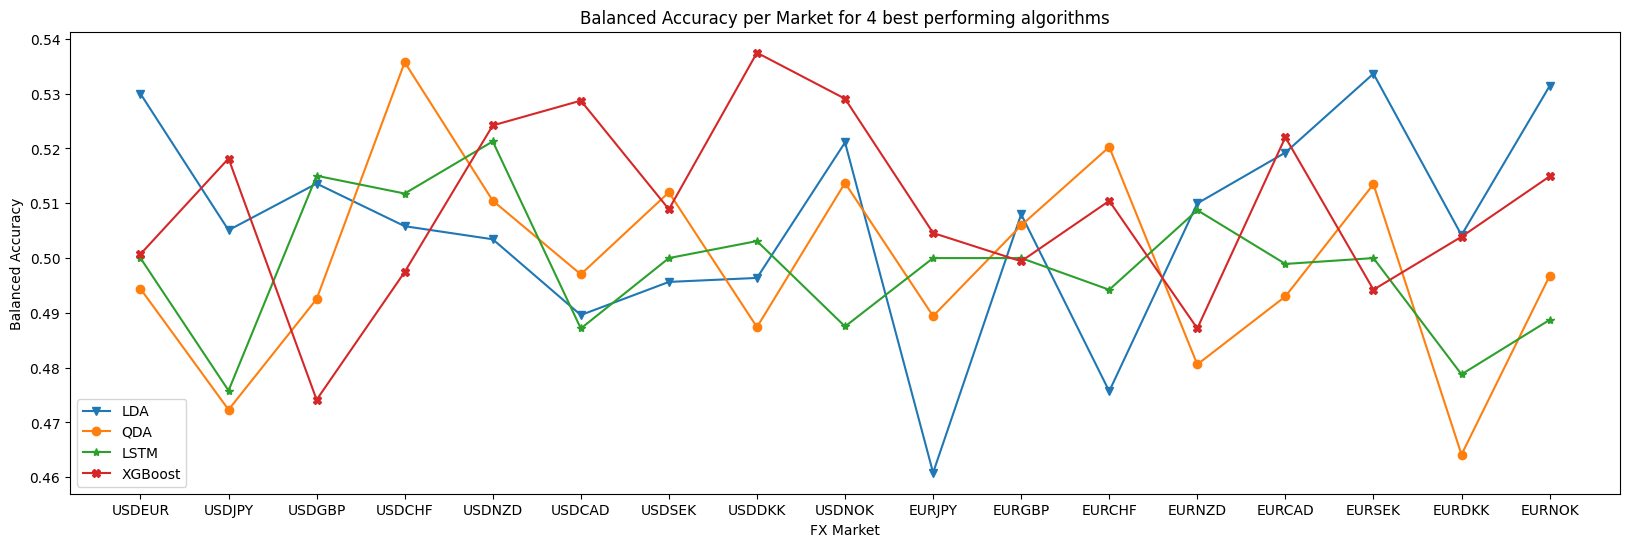

In [ ]:
# Plot the balanced accuracy for 4 best-performing algorithms
plt.figure(figsize=(20,6))

columns_to_plot = ['LDA', 'QDA', 'LSTM', 'XGBoost']
i = 0
for column in columns_to_plot:
    plt.plot(list(fx_dic.keys()), df_concat[column], label=column, marker=marker_list[i])
    i += 1

plt.legend()
plt.title('Balanced Accuracy per Market for 4 best performing algorithms')
plt.xlabel('FX Market')
plt.ylabel('Balanced Accuracy')

plt.show()


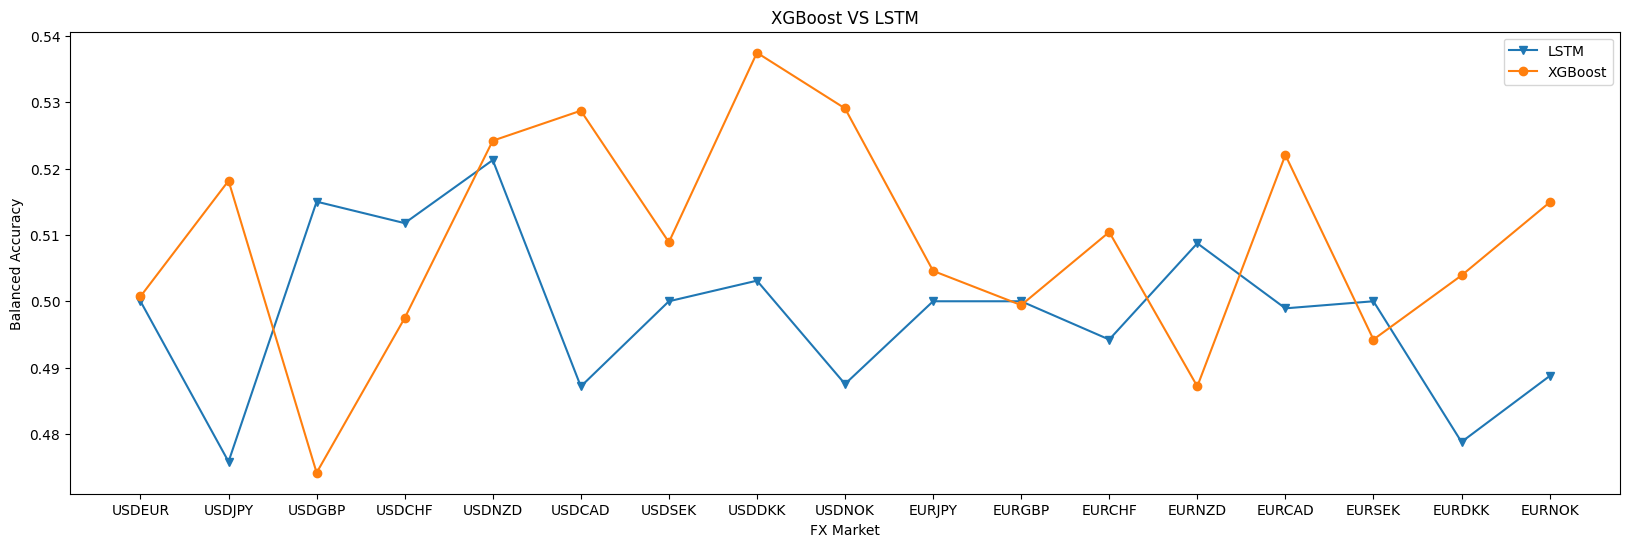

In [ ]:
# Plot the balanced accuracy comparison between XGBoost and LSTM
plt.figure(figsize=(20,6))
marker_list1 = ['v', 'o']
columns_to_plot = ['LSTM', 'XGBoost']
i = 0
for column in columns_to_plot:
    plt.plot(list(fx_dic.keys()), df_concat[column], label=column, marker=marker_list1[i])
    i += 1

plt.legend()
plt.title('XGBoost VS LSTM')
plt.xlabel('FX Market')
plt.ylabel('Balanced Accuracy')

plt.show()